In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version {}".format(tf.__version__))

/home/rj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow version 1.12.0


In [2]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [3]:
mnist

<module 'tensorflow._api.v1.keras.datasets.mnist' from '/home/rj/anaconda3/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/mnist/__init__.py'>

In [4]:
labels_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
print("Data type:", type(images_train))
print("Dataset shape:", (images_train.shape))

Data type: <class 'numpy.ndarray'>
Dataset shape: (60000, 28, 28)


In [6]:
print("Labels:", len(labels_train))
print("Possible values:", np.unique(labels_train))

Labels: 60000
Possible values: [0 1 2 3 4 5 6 7 8 9]


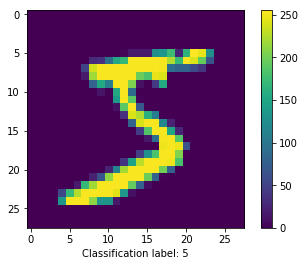

In [7]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

In [8]:

images_train = images_train / 255.0
images_test = images_test / 255.0

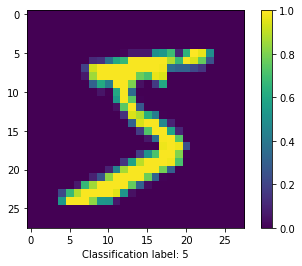

In [9]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

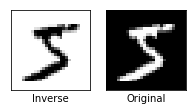

In [10]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 6, 1)
plt.xticks([])
plt.yticks([])
plt.xlabel("Inverse")
plt.imshow(images_train[0], cmap=plt.cm.binary)

plt.subplot(3, 6, 2)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original")
plt.imshow(images_train[0], cmap=plt.cm.gray)

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(images_train, labels_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 37s 612us/step - loss: 0.2173 - acc: 0.9336
Epoch 2/5
60000/60000 [==============================] - 37s 609us/step - loss: 0.1029 - acc: 0.9682
Epoch 3/5
60000/60000 [==============================] - 36s 598us/step - loss: 0.0804 - acc: 0.9746
Epoch 4/5
60000/60000 [==============================] - 36s 600us/step - loss: 0.0685 - acc: 0.9786
Epoch 5/5
60000/60000 [==============================] - 40s 673us/step - loss: 0.0550 - acc: 0.9831


In [13]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 148us/step
Test accuracy: 0.9797


In [14]:

example_img = images_test[0]

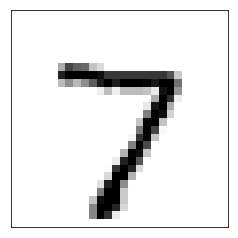

In [15]:
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img, cmap=plt.cm.binary)

In [16]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print("Predicted value:", np.argmax(img_prediction))

Image data shape: (1, 28, 28)
Prediction results: [[2.94100399e-12 8.57188098e-09 2.87152176e-07 3.71775513e-07
  6.51342608e-12 1.06611345e-10 6.47053593e-15 9.99998927e-01
  9.98285454e-09 4.96850078e-07]]
Predicted value: 7


In [17]:

import matplotlib.pyplot as plt
import numpy as np


def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

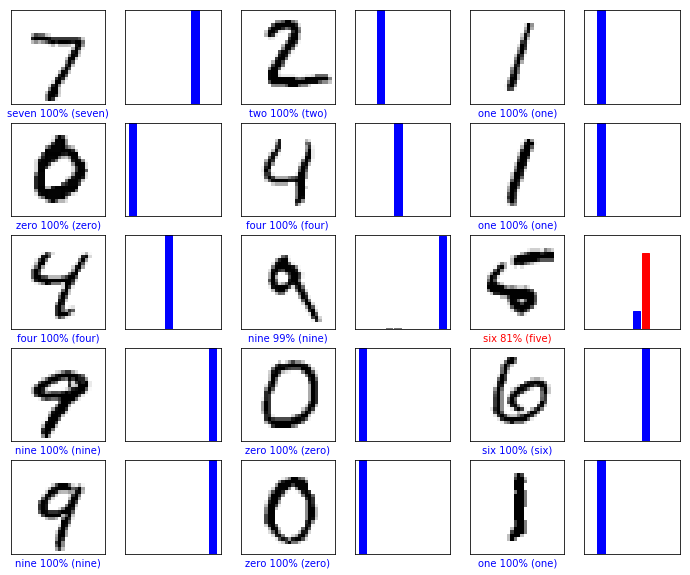

In [18]:
predictions = model.predict(images_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels_test)

In [19]:
model.summary()
loss, acc = model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
1000

In [20]:

keras_mnist_model = 'mnist_model.h5'

In [21]:
model.save(keras_mnist_model)

In [22]:
new_model = keras.models.load_model(keras_mnist_model)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
loss, acc = new_model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

10000/10000 [==============================] - 1s 144us/step
Restored model, accuracy: 97.97%
Restored model, loss: 0.06690497246851446


In [24]:
tflite_mnist_model = "mnist_model.tflite"

converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_mnist_model)
tflite_model = converter.convert()
open(tflite_mnist_model, "wb").write(tflite_model)

INFO:tensorflow:Froze 6 variables.
INFO:tensorflow:Converted 6 variables to const ops.


2680200